In [63]:
import matplotlib.pyplot as plt
import torch as t

from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [64]:
train_data = datasets.MNIST(
    "./data", train=True, download=True, transform=transforms.ToTensor()
)
test_data = datasets.MNIST(
    "./data", train=False, download=True, transform=transforms.ToTensor()
)

print(len(train_data), len(test_data))

60000 10000


In [65]:
class Autoencoder(nn.Module):
    def __init__(self, code_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, code_size),
        )
        self.decoder = nn.Sequential(
            nn.Linear(code_size, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(), # Sigmod function to get values between 0 and 1
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded.view(-1, 1, 28, 28)
    


In [66]:
from torch.utils.data import DataLoader
def train(autoencoder, optimizer, data):
  train_loader = DataLoader(data, batch_size=128, shuffle=True)
  autoencoder.train()
  for img, _ in train_loader:
    optimizer.zero_grad()
    output = autoencoder(img)
    loss = nn.MSELoss()(output, img)
    loss.backward()
    optimizer.step()
    print(loss.item())

  
autoencoder = Autoencoder(code_size=16)
optimizer =t.optim.Adam(autoencoder.parameters(), lr=1e-3)


In [67]:
for epoch in range(10):
  print("Epoch: ", epoch)
  train(autoencoder, optimizer, train_data)

Epoch:  0
0.2343384027481079
0.23066996037960052
0.228975310921669
0.22604165971279144
0.2237113118171692
0.2193678617477417
0.21476353704929352
0.2080257385969162
0.20200428366661072
0.19284795224666595
0.18342602252960205
0.17120742797851562
0.1576317846775055
0.14342936873435974
0.1332177072763443
0.11959891766309738
0.10639849305152893
0.10140909254550934
0.09373323619365692
0.0874795988202095
0.08434196561574936
0.07697508484125137
0.07825856655836105
0.07668790221214294
0.08112376928329468
0.07740625739097595
0.07230773568153381
0.07451172918081284
0.0729353055357933
0.07377767562866211
0.07612968981266022
0.07337424904108047
0.07273464649915695
0.06978696584701538
0.07061371952295303
0.07338161021471024
0.0698034018278122
0.07215145975351334
0.07315734773874283
0.07056982070207596
0.06781097501516342
0.06926225870847702
0.07628196477890015
0.07215713709592819
0.0742156133055687
0.0748363733291626
0.0696026086807251
0.06962931901216507
0.07293913513422012
0.07020340859889984
0.07

torch.Size([1, 28, 28])


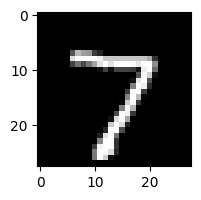

torch.Size([1, 28, 28])


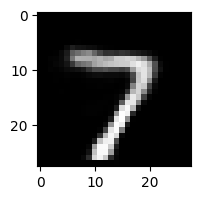

torch.Size([1, 28, 28])


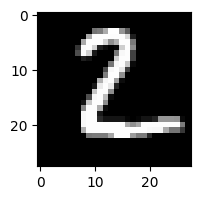

torch.Size([1, 28, 28])


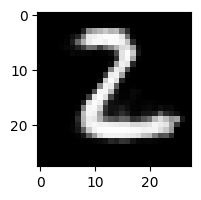

torch.Size([1, 28, 28])


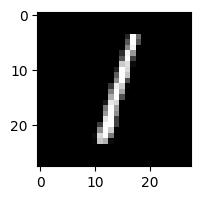

torch.Size([1, 28, 28])


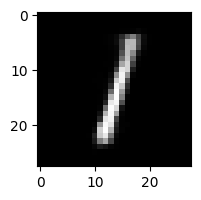

torch.Size([1, 28, 28])


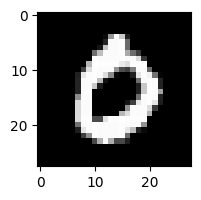

torch.Size([1, 28, 28])


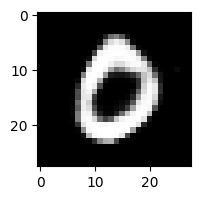

torch.Size([1, 28, 28])


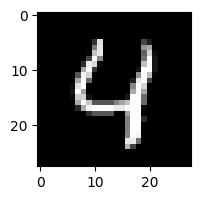

torch.Size([1, 28, 28])


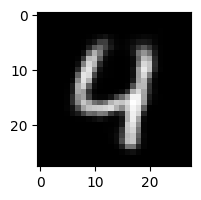

In [68]:
for i in range(5):
  image = test_data[i][0]
  plt.figure(figsize=(9, 2))
  plt.imshow(image[0], cmap="gray")
  print(image.shape)
  plt.show()
  encoded_image = autoencoder.forward(image.unsqueeze(0))[0].detach()
  print(encoded_image.shape)
  plt.figure(figsize=(9, 2))
  plt.imshow(encoded_image[0], cmap="gray")
  plt.show()
  

In [69]:
noise_factor = 0.3
train_data_clean_noisy = []
for img, _ in train_data:
  noisy_img = img + noise_factor * t.randn(*img.shape)
  noisy_img = t.clamp(noisy_img, 0., 1.)
  train_data_clean_noisy.append((img, noisy_img))


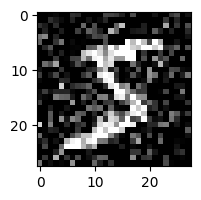

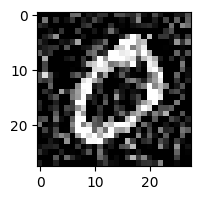

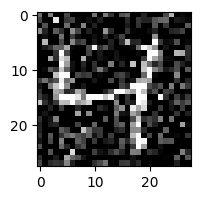

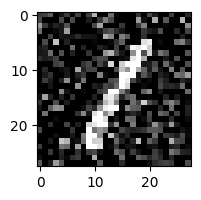

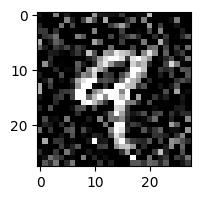

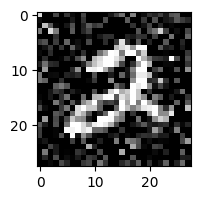

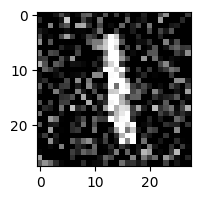

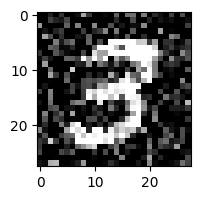

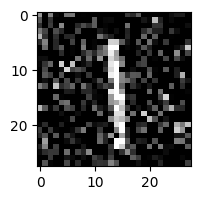

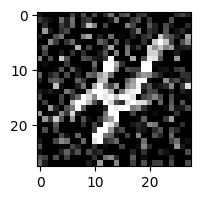

In [70]:
for i in range(10):
  plt.figure(figsize=(9, 2))
  plt.imshow(train_data_clean_noisy[i][1][0], cmap="gray")
  plt.show()

In [71]:
class ConvolutaionalAutoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1, 16, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, stride=2, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 64, 7),
    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 32, 7),
        nn.ReLU(),
        nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
        nn.ReLU(),
        nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
        nn.Sigmoid(),
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded.view(-1, 1, 28, 28)

In [72]:
def train_denoised(autoencoder, optimizer, data_clean_noisy):
  train_loader = DataLoader(data_clean_noisy, batch_size=128, shuffle=True)
  autoencoder.train()
  for clean_img, noisy_img in train_loader:
    print(clean_img.shape)
    optimizer.zero_grad()
    output = autoencoder(noisy_img)
    loss = nn.MSELoss()(output, clean_img)
    loss.backward()
    optimizer.step()
    print(loss.item())

autoencoder = ConvolutaionalAutoencoder()
optimizer = t.optim.Adam(autoencoder.parameters(), lr=1e-3)


In [73]:
for epoch in range(3):
  print("Epoch: ", epoch)
  train(autoencoder, optimizer, train_data_clean_noisy)

Epoch:  0
0.254412442445755
0.25313594937324524
0.2519008219242096
0.2519412338733673
0.24995701014995575
0.2477584332227707
0.24589447677135468
0.2418379932641983
0.2391539216041565
0.2309587597846985
0.22315369546413422
0.21268171072006226
0.2013683319091797
0.18931160867214203
0.1765502393245697
0.16405513882637024
0.1550479233264923
0.14367131888866425
0.13238173723220825
0.12313371896743774
0.11420224606990814
0.10961315780878067
0.1111549362540245
0.10262401401996613
0.10274582356214523
0.09991038590669632
0.0983959212899208
0.0914282500743866
0.09434261173009872
0.093669094145298
0.0942392572760582
0.08758973330259323
0.08707889169454575
0.09145119786262512
0.09153712540864944
0.08823521435260773
0.08613473176956177
0.09039927273988724
0.08168049156665802
0.08599027246236801
0.08532647043466568
0.087458536028862
0.08287253975868225
0.08056823909282684
0.08224780112504959
0.08240608125925064
0.0836639329791069
0.08231968432664871
0.08372503519058228
0.08177120983600616
0.08052880

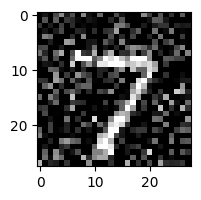

torch.Size([1, 28, 28])


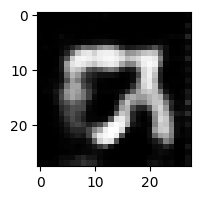

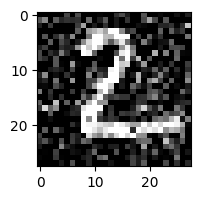

torch.Size([1, 28, 28])


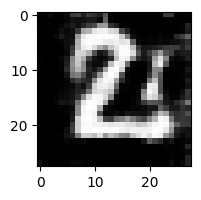

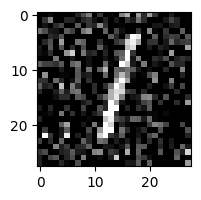

torch.Size([1, 28, 28])


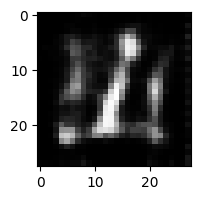

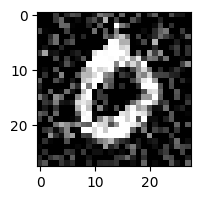

torch.Size([1, 28, 28])


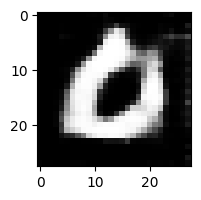

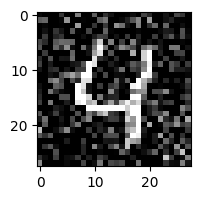

torch.Size([1, 28, 28])


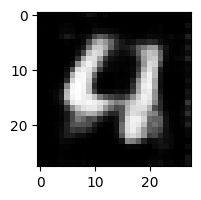

In [74]:
## Geneate test data for noisey images
test_data_clean_noisy = []
for img, _ in test_data:
  noisy_img = img + noise_factor * t.randn(*img.shape)
  noisy_img = t.clamp(noisy_img, 0., 1.)
  test_data_clean_noisy.append((img, noisy_img))

for i in range(5):
  image_clean, image_noisy = test_data_clean_noisy[i]
  plt.figure(figsize=(9, 2))
  plt.imshow(image_noisy[0], cmap="gray")
  plt.show()
  encoded_image = autoencoder.forward(image_noisy.unsqueeze(0))[0].detach()
  print(encoded_image.shape)
  plt.figure(figsize=(9, 2))
  plt.imshow(encoded_image[0], cmap="gray")
  plt.show()

<Figure size 900x200 with 0 Axes>

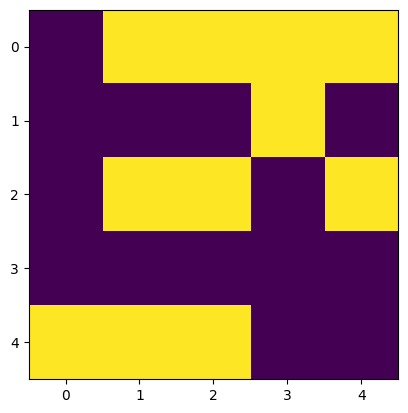

In [75]:
from poisoned_dataset import PoisonedDataset, create_trigger

# This will be used for the remainder of the notebook.
trigger = create_trigger(5)
plt.figure(figsize=(9, 2))
plt.figure()
plt.imshow(trigger)
plt.show()


In [76]:

# used for testing purposes
all_poisoned_test_data = PoisonedDataset(test_data, trigger, poison_fraction=0.5)
# {img, label, is_poisoned}

In [77]:
anomalyDetector = ConvolutaionalAutoencoder()
optimizer = t.optim.Adam(anomalyDetector.parameters(), lr=1e-3)
for epoch in range(10):
  print("Epoch: ", epoch)
  train_denoised(anomalyDetector, optimizer, train_data_clean_noisy)



Epoch:  0
torch.Size([128, 1, 28, 28])
0.2560979425907135
torch.Size([128, 1, 28, 28])
0.2548876404762268
torch.Size([128, 1, 28, 28])
0.2534997761249542
torch.Size([128, 1, 28, 28])
0.25326603651046753
torch.Size([128, 1, 28, 28])
0.2520117461681366
torch.Size([128, 1, 28, 28])
0.2498006969690323
torch.Size([128, 1, 28, 28])
0.24744491279125214
torch.Size([128, 1, 28, 28])
0.24462971091270447
torch.Size([128, 1, 28, 28])
0.23882390558719635
torch.Size([128, 1, 28, 28])
0.23385055363178253
torch.Size([128, 1, 28, 28])
0.2256683111190796
torch.Size([128, 1, 28, 28])
0.2146836668252945
torch.Size([128, 1, 28, 28])
0.20242583751678467
torch.Size([128, 1, 28, 28])
0.18918588757514954
torch.Size([128, 1, 28, 28])
0.17468594014644623
torch.Size([128, 1, 28, 28])
0.1635832041501999
torch.Size([128, 1, 28, 28])
0.14855298399925232
torch.Size([128, 1, 28, 28])
0.13103918731212616
torch.Size([128, 1, 28, 28])
0.12186965346336365
torch.Size([128, 1, 28, 28])
0.11147388070821762
torch.Size([128, 1

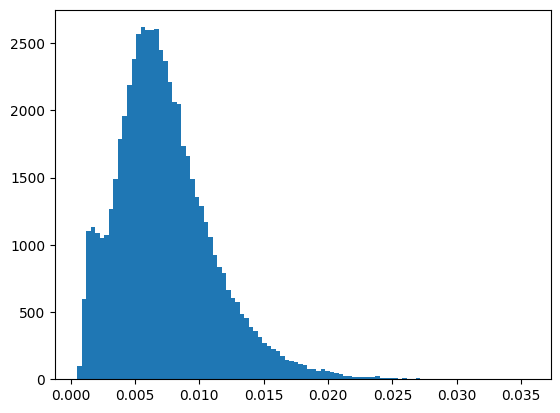

In [78]:
# graph the reconstruction error
def get_reconstruction_error(autoencoder, data):
  errors = []
  for img, _ in data:
    output = autoencoder(img.unsqueeze(0))
    error = nn.MSELoss()(output, img.unsqueeze(0))
    errors.append(error.item())
  return errors
# graph
plt.figure()
plt.hist(get_reconstruction_error(anomalyDetector, train_data_clean_noisy), bins=100)
plt.show()



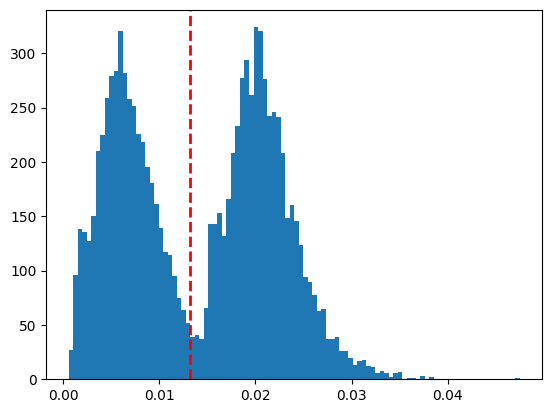

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Compute the histogram
reconstruction_error = get_reconstruction_error(anomalyDetector, all_poisoned_test_data)
hist, bin_edges = np.histogram(reconstruction_error, bins=100)

# Find peaks
peaks, _ = find_peaks(hist)

# If less than two peaks are found, print a message and exit
if len(peaks) < 2:
    print("Less than two peaks found.")
    # sys.exit()

# Sort peaks by their height
peaks_sorted = peaks[np.argsort(hist[peaks])][::-1]  # Sort peaks from largest to smallest

# Find local minima
from scipy.signal import argrelextrema
local_minima = argrelextrema(hist, np.less)[0]

if len(local_minima) > 0:
    # Find the two largest peaks
    peak1_bin = bin_edges[peaks_sorted[0]]
    peak2_bin = bin_edges[peaks_sorted[1]]
    
    # Calculate the midpoint between the two peaks
    midpoint = (peak1_bin + peak2_bin) / 2

    # Find the first minimum after the midpoint
    minima_after_midpoint = [m for m in local_minima if bin_edges[m] > midpoint]
    if minima_after_midpoint:
        valley = bin_edges[minima_after_midpoint[0]]
    else:
        print("No minima found after the midpoint")
else:
    print("No local minima found")

# Show histogram
plt.figure()
plt.hist(reconstruction_error, bins=100)
plt.axvline(x=valley, color='r', linestyle='dashed', linewidth=2)  # Show the valley in the plot
plt.show()


In [80]:
import matplotlib.pyplot as plt

# print("Valley: {:.6f}".format(valley))
error_cuttoff = valley

n_correct = 0
n_false_positive = 0
n_false_negative = 0
for img,(label,poisoned) in all_poisoned_test_data:
  output = anomalyDetector(img.unsqueeze(0))
  error = nn.MSELoss()(output, img.unsqueeze(0))
  if error.item() > error_cuttoff:
    if poisoned:
      n_correct += 1
    else:
      n_false_positive += 1
  else:
    if poisoned:
      n_false_negative += 1
    else:
      n_correct += 1

accuracy = n_correct / len(all_poisoned_test_data)
false_positive_rate = n_false_positive / len(all_poisoned_test_data)
false_negative_rate = n_false_negative / len(all_poisoned_test_data)

print("Accuracy: {:.2%}".format(accuracy))
print("False Positive Rate: {:.2%}".format(false_positive_rate))
print("False Negative Rate: {:.2%}".format(false_negative_rate))



Accuracy: 96.81%
False Positive Rate: 3.19%
False Negative Rate: 0.00%
